In [3]:
!pip install openpyxl
!pip install imbalanced-learn
!pip3 install ipympl
!pip install import-ipynb
!pip install shapely
!pip install SciencePlots 
!pip install seaborn
!pip install tqdm
!pip install ipywidgets

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
import os, sys
from numpy import nan
import re
import ipympl
# from IPython.core.display import display, HTML
import ipywidgets
import json
from os import listdir
import glob
import math
from IPython.display import Image, display, HTML
from shapely.geometry import mapping
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, RepeatedKFold, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error, precision_score, recall_score, mean_absolute_error, make_scorer
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from cubist import Cubist
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, LeaveOneOut, cross_validate
from sklearn.impute import SimpleImputer
from tqdm.notebook import tqdm
from sklearn.svm import SVC
from tqdm import tqdm
import pickle
from imblearn.over_sampling import SMOTE
from scipy.stats import ks_2samp
from scipy import stats
np.seterr(divide='ignore', invalid='ignore')
pd.options.display.max_columns = 100
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
from scipy.signal import savgol_filter
from scipy.spatial import ConvexHull
from scipy.interpolate import interp1d

In [5]:
import import_ipynb
from SoilPrep import * 

importing Jupyter notebook from SoilPrep.ipynb


In [6]:
# Colour scheme definition
kado = '#8B7355'
mati = '#A52A2A'
balu = '#F4A460'

In [7]:
df0 = pd.read_csv('uae.csv')
df1 = pd.read_csv('uae_emit.csv')
df_faulty = pd.read_csv('oil.csv')
df_faulty = df_faulty.T
df_faulty.columns = df_faulty.iloc[0,:].copy()
df_faulty = df_faulty.reset_index(drop=True)
df_faulty = df_faulty.iloc[1:, :].copy()
df_faulty.head(5)

FID,Lon,Lat,TOC,clay,silt,sand,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,...,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
1,55.492275,23.552685,0.1,1.0,3.0,95.0,0.147384,0.140758,0.143106,0.138481,0.132889,0.132365,0.140567,0.145522,0.146547,0.144018,0.140495,0.134976,0.128514,0.132869,0.14006,0.141353,0.139625,0.139169,0.137819,0.137966,0.140117,0.139196,0.13964,0.136525,0.13696,0.144001,0.137988,0.133036,0.139889,0.14313,0.144857,0.148437,0.141715,0.13652,0.138323,0.141989,0.143525,0.141997,0.144547,0.144781,0.144585,0.145841,0.144191,0.142869,...,0.38848,0.388269,0.387895,0.387334,0.386925,0.386181,0.385504,0.384714,0.383881,0.383614,0.383105,0.382308,0.381538,0.380226,0.378789,0.37817,0.377805,0.376949,0.376363,0.375734,0.374695,0.374062,0.373034,0.371878,0.370953,0.369999,0.369407,0.368928,0.368141,0.367275,0.366907,0.366236,0.365517,0.365589,0.364998,0.364573,0.364776,0.364143,0.363765,0.36274,0.362308,0.362373,0.361849,0.361183,0.360672,0.359789,0.359369,0.360269,0.360636,0.360275
2,55.347738,24.563613,0.36,1.0,3.0,92.0,0.107708,0.12048,0.118656,0.110696,0.109386,0.119877,0.11704,0.108933,0.113413,0.111813,0.110449,0.109622,0.10584,0.107781,0.110732,0.111195,0.10925,0.108217,0.106794,0.106294,0.109633,0.112104,0.10908,0.106016,0.108418,0.112928,0.116641,0.117762,0.110848,0.109517,0.110976,0.114801,0.120665,0.116811,0.108272,0.109651,0.113465,0.116031,0.119751,0.117462,0.114801,0.11637,0.117038,0.116923,...,0.440064,0.439179,0.438451,0.437691,0.436639,0.435552,0.434255,0.433271,0.432409,0.431185,0.430161,0.428823,0.427274,0.426205,0.425026,0.423971,0.423021,0.421318,0.419488,0.417887,0.416031,0.414673,0.413735,0.412574,0.411517,0.410299,0.408676,0.407147,0.405584,0.404334,0.403316,0.402674,0.402265,0.401354,0.400608,0.398984,0.396881,0.396484,0.395881,0.395938,0.395353,0.392936,0.391802,0.391013,0.390243,0.390619,0.390157,0.389124,0.388596,0.388053
3,55.341347,24.564805,0.73,3.0,3.0,70.0,0.123474,0.132006,0.128345,0.122122,0.122533,0.129573,0.126109,0.119737,0.126212,0.120661,0.116432,0.116978,0.116856,0.118878,0.119912,0.122717,0.119618,0.116883,0.116783,0.118679,0.122829,0.123479,0.119051,0.117122,0.121438,0.123188,0.124618,0.125596,0.120379,0.119375,0.120714,0.125056,0.131775,0.128325,0.11953,0.119723,0.1225,0.124701,0.12926,0.127101,0.123995,0.125157,0.126464,0.127401,...,0.405107,0.404318,0.403814,0.403219,0.40263,0.40171,0.400446,0.399237,0.398129,0.397338,0.396601,0.395618,0.394579,0.393645,0.392607,0.391566,0.391052,0.390201,0.388699,0.387626,0.386069,0.384268,0.38308,0.381739,0.380624,0.37989,0.378756,0.377813,0.377073,0.376136,0.375372,0.374409,0.373105,0.37202,0.371269,0.370541,0.369809,0.36904,0.368439,0.368837,0.368531,0.367858,0.36675,0.364713,0.363653,0.362787,0.362826,0.363009,0.363605,0.363678
4,55.3351,24.564498,0.37,2.0,3.0,94.0,0.117468,0.126586,0.130169,0.125004,0.122437,0.130308,0.126158,0.119881,0.129225,0.12595,0.122025,0.120808,0.118696,0.121155,0.122217,0.119432,0.118452,0.121439,0.123461,0.121393,0.123775,0.127251,0.121443,0.117901,0.122875,0.129424,0.130326,0.128882,0.12443,0.123467,0.123918,0.127237,0.134958,0.131433,0.121907,0.123979,0.126701,0.127556,0.131838,0.130399,0.128256,0.12996,0.131326,0.131258,...,0.412217,0.411526,0.410702,0.410194,0.409645,0.408783,0.408021,0.406805,0.405306,0.403766,0.402285,0.400919,0.399544,0.398641,0.397482,0.396321,0.395575,0.394367,0.392869,0.391523,0.390169,0.388931,0.387955,0.387014,0.38602,0.38468,0.383166,0.382149,0.381173,0.380619,0.380129,0.378932,0.377579,0.376103,0.374897,0.374065,0.373419,0.372717,0.371752,0.371426,0.370784,0.369852,0.369014,0.367799,0.367122,0.367011,0.367033,0.366331,0.365804,0.365767
5,55.331138,

In [8]:
df1.rename(columns= {'latitude':'long', 'longitude': 'lat'}, inplace=True)
df0.rename(columns = {'Lon': 'long', 'Lat':'lat'}, inplace = True)
df_faulty.rename(columns = {'Lon': 'long', 'Lat':'lat'}, inplace = True)

In [9]:
df0.head(5)

,FID,long,lat,TOC,clay,silt,sand,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,...,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1,54.736553,24.236353,0.22,0,1.0,98.0,0.089311,0.101862,0.116344,0.117707,0.113324,0.113424,0.115095,0.110248,0.103506,0.105503,0.110169,0.112541,0.118426,0.115746,0.105909,0.107894,0.107123,0.109696,0.117092,0.117855,0.119902,0.121461,0.116911,0.112778,0.115075,0.119952,0.121716,0.123712,0.124466,0.123697,0.121629,0.121883,0.124804,0.122874,0.119764,0.123741,0.127166,0.126157,0.124842,0.123106,0.122967,0.125440,0.125761,...,0.505024,0.503972,0.503082,0.502225,0.500965,0.499482,0.498255,0.497150,0.495687,0.494069,0.492573,0.490743,0.489241,0.487959,0.486013,0.484152,0.482461,0.480586,0.478966,0.477298,0.475440,0.473770,0.471942,0.470410,0.469083,0.467510,0.466006,0.464431,0.462235,0.460467,0.459512,0.458457,0.457830,0.457056,0.455510,0.453568,0.451408,0.450124,0.449204,0.449205,0.448691,0.447846,0.446950,0.445301,0.444228,0.443859,0.443358,0.442132,0.440855,0.440254
1,2,54.712263,24.253125,0.23,0,0.0,100.0,0.071750,0.082479,0.097936,0.097098,0.090665,0.095351,0.098170,0.092902,0.085862,0.087585,0.090802,0.091751,0.100449,0.096611,0.084396,0.089818,0.089340,0.090029,0.096445,0.094647,0.095934,0.099914,0.094580,0.091928,0.096085,0.098593,0.098399,0.100215,0.103574,0.103900,0.101460,0.100196,0.101961,0.101015,0.099445,0.101963,0.103266,0.101319,0.100529,0.099800,0.100243,0.102263,0.101308,...,0.450318,0.448831,0.447116,0.445905,0.445075,0.443562,0.442045,0.440411,0.438146,0.436031,0.434178,0.431873,0.429721,0.427904,0.426066,0.424598,0.423261,0.421830,0.420088,0.417828,0.415412,0.412745,0.410257,0.408520,0.406483,0.404732,0.403398,0.401255,0.399124,0.397683,0.396048,0.394434,0.393051,0.390887,0.388737,0.387267,0.386171,0.385700,0.384558,0.383507,0.382384,0.380523,0.379745,0.379368,0.378552,0.378313,0.376914,0.375947,0.374874,0.374323
2,3,54.628437,24.201236,0.54,7,2.0,71.0,0.041403,0.053078,0.069837,0.072832,0.069875,0.074908,0.074440,0.068492,0.064969,0.060439,0.061995,0.069090,0.075366,0.072394,0.063782,0.066973,0.063572,0.064333,0.076012,0.074383,0.073874,0.076919,0.069139,0.067084,0.073654,0.077595,0.078171,0.078817,0.079354,0.078619,0.076882,0.076737,0.078894,0.078441,0.077030,0.078739,0.080757,0.080092,0.078368,0.077739,0.078954,0.081610,0.081029,...,0.254087,0.253243,0.252018,0.250617,0.249314,0.247589,0.246501,0.245682,0.244078,0.242976,0.241615,0.239750,0.238310,0.236734,0.235230,0.233702,0.232329,0.231019,0.229220,0.227910,0.226667,0.224981,0.223713,0.222331,0.220553,0.219432,0.218279,0.216748,0.215095,0.212785,0.210994,0.210149,0.209413,0.208985,0.208481,0.207685,0.206786,0.205675,0.205031,0.203774,0.202939,0.202970,0.201991,0.200577,0.199762,0.198509,0.197953,0.196985,0.196200,0.196456
3,4,54.637328,24.167353,0.06,0,1.0,74.0,0.127570,0.137622,0.152223,0.150098,0.142105,0.142880,0.146324,0.144206,0.141614,0.138125,0.138871,0.142214,0.146783,0.144006,0.135700,0.141869,0.140081,0.139891,0.145967,0.144568,0.146686,0.150084,0.145208,0.141791,0.146449,0.151923,0.151835,0.152822,0.155049,0.154900,0.152437,0.152329,0.154825,0.153069,0.150946,0.155493,0.159144,0.157156,0.154593,0.153615,0.155277,0.159256,0.158817,...,0.477536,0.476374,0.475360,0.474317,0.472941,0.471083,0.469237,0.467607,0.465895,0.464562,0.463261,0.461304,0.459077,0.456753,0.454284,0.452215,0.450451,0.448153,0.445981,0.443916,0.441472,0.439588,0.437714,0.435782,0.434151,0.432324,0.430425,0.428736,0.426160,0.423627,0.422163,0.420034,0.418287,0.417215,0.415542,0.414107,0.413113,0.412229,0.411363,0.410837,0.410158,0.409710,0.408636,0.406409,0.405014,0.403905,0.403292,0.403064,0.402813,0.401774
4,5,54.871967,24

In [10]:
# obtaining faulty rows of df0 using the data frame df_faulty ---------------------------------- 

faulty_rows =[]
(row, col) = df0.shape
for i in range (0, row):
    lat = df0.loc[i,'lat']
    long = df0.loc[i,'long']
    temp = df_faulty.loc[:,:][(df_faulty.loc[:,'lat'] == lat) & (df_faulty.loc[:,'long'] == long)]
    (r, c) = temp.shape
    if r != 0:
        faulty_rows.append(i)
        #print(r, c, 'at', i)

In [11]:
# removing faulty rows from lab data --------------------------------------------

clean_lab = df0.drop(df0.index[faulty_rows]).copy()

In [12]:
clean_lab.head(4)

,FID,long,lat,TOC,clay,silt,sand,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,...,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1,54.736553,24.236353,0.22,0,1.0,98.0,0.089311,0.101862,0.116344,0.117707,0.113324,0.113424,0.115095,0.110248,0.103506,0.105503,0.110169,0.112541,0.118426,0.115746,0.105909,0.107894,0.107123,0.109696,0.117092,0.117855,0.119902,0.121461,0.116911,0.112778,0.115075,0.119952,0.121716,0.123712,0.124466,0.123697,0.121629,0.121883,0.124804,0.122874,0.119764,0.123741,0.127166,0.126157,0.124842,0.123106,0.122967,0.125440,0.125761,...,0.505024,0.503972,0.503082,0.502225,0.500965,0.499482,0.498255,0.497150,0.495687,0.494069,0.492573,0.490743,0.489241,0.487959,0.486013,0.484152,0.482461,0.480586,0.478966,0.477298,0.475440,0.473770,0.471942,0.470410,0.469083,0.467510,0.466006,0.464431,0.462235,0.460467,0.459512,0.458457,0.457830,0.457056,0.455510,0.453568,0.451408,0.450124,0.449204,0.449205,0.448691,0.447846,0.446950,0.445301,0.444228,0.443859,0.443358,0.442132,0.440855,0.440254
1,2,54.712263,24.253125,0.23,0,0.0,100.0,0.071750,0.082479,0.097936,0.097098,0.090665,0.095351,0.098170,0.092902,0.085862,0.087585,0.090802,0.091751,0.100449,0.096611,0.084396,0.089818,0.089340,0.090029,0.096445,0.094647,0.095934,0.099914,0.094580,0.091928,0.096085,0.098593,0.098399,0.100215,0.103574,0.103900,0.101460,0.100196,0.101961,0.101015,0.099445,0.101963,0.103266,0.101319,0.100529,0.099800,0.100243,0.102263,0.101308,...,0.450318,0.448831,0.447116,0.445905,0.445075,0.443562,0.442045,0.440411,0.438146,0.436031,0.434178,0.431873,0.429721,0.427904,0.426066,0.424598,0.423261,0.421830,0.420088,0.417828,0.415412,0.412745,0.410257,0.408520,0.406483,0.404732,0.403398,0.401255,0.399124,0.397683,0.396048,0.394434,0.393051,0.390887,0.388737,0.387267,0.386171,0.385700,0.384558,0.383507,0.382384,0.380523,0.379745,0.379368,0.378552,0.378313,0.376914,0.375947,0.374874,0.374323
2,3,54.628437,24.201236,0.54,7,2.0,71.0,0.041403,0.053078,0.069837,0.072832,0.069875,0.074908,0.074440,0.068492,0.064969,0.060439,0.061995,0.069090,0.075366,0.072394,0.063782,0.066973,0.063572,0.064333,0.076012,0.074383,0.073874,0.076919,0.069139,0.067084,0.073654,0.077595,0.078171,0.078817,0.079354,0.078619,0.076882,0.076737,0.078894,0.078441,0.077030,0.078739,0.080757,0.080092,0.078368,0.077739,0.078954,0.081610,0.081029,...,0.254087,0.253243,0.252018,0.250617,0.249314,0.247589,0.246501,0.245682,0.244078,0.242976,0.241615,0.239750,0.238310,0.236734,0.235230,0.233702,0.232329,0.231019,0.229220,0.227910,0.226667,0.224981,0.223713,0.222331,0.220553,0.219432,0.218279,0.216748,0.215095,0.212785,0.210994,0.210149,0.209413,0.208985,0.208481,0.207685,0.206786,0.205675,0.205031,0.203774,0.202939,0.202970,0.201991,0.200577,0.199762,0.198509,0.197953,0.196985,0.196200,0.196456
3,4,54.637328,24.167353,0.06,0,1.0,74.0,0.127570,0.137622,0.152223,0.150098,0.142105,0.142880,0.146324,0.144206,0.141614,0.138125,0.138871,0.142214,0.146783,0.144006,0.135700,0.141869,0.140081,0.139891,0.145967,0.144568,0.146686,0.150084,0.145208,0.141791,0.146449,0.151923,0.151835,0.152822,0.155049,0.154900,0.152437,0.152329,0.154825,0.153069,0.150946,0.155493,0.159144,0.157156,0.154593,0.153615,0.155277,0.159256,0.158817,...,0.477536,0.476374,0.475360,0.474317,0.472941,0.471083,0.469237,0.467607,0.465895,0.464562,0.463261,0.461304,0.459077,0.456753,0.454284,0.452215,0.450451,0.448153,0.445981,0.443916,0.441472,0.439588,0.437714,0.435782,0.434151,0.432324,0.430425,0.428736,0.426160,0.423627,0.422163,0.420034,0.418287,0.417215,0.415542,0.414107,0.413113,0.412229,0.411363,0.410837,0.410158,0.409710,0.408636,0.406409,0.405014,0.403905,0.403292,0.403064,0.402813,0.401774


In [13]:
# obtaining faulty rows of df1 using the data frame df_faulty ---------------------------------- 

faulty_rows =[]
(row, col) = df1.shape
for i in range (0, row):
    lat = df1.loc[i,'lat']
    long = df1.loc[i,'long']
    temp = df_faulty.loc[:,:][(df_faulty.loc[:,'lat'] == lat) & (df_faulty.loc[:,'long'] == long)]
    (r, c) = temp.shape
    if r != 0:
        faulty_rows.append(i)
        #print(r, c, 'at', i)

In [14]:
# removing faulty rows from satellite data --------------------------------------------

clean_sat = df1.drop(df1.index[faulty_rows]).copy()

In [27]:
clean_sat.head(5)
clean_sat.shape

(91, 292)

In [44]:
# obtaining corresponding rows of clean_sat using clean_lab and removing extra rows -------------- 

missing_rows =[]
small_lab = clean_lab.iloc[0:91,:].copy()

(row, col) = clean_sat.shape
for i in range (0, row):
    lat = clean_sat.iloc[i, clean_sat.columns.get_loc('lat')]
    long = clean_sat.iloc[i, clean_sat.columns.get_loc('long')]
    temp = clean_lab.loc[:,:][(clean_lab.loc[:,'lat'] == lat) & (clean_lab.loc[:,'long'] == long)]
    (r, c) = temp.shape
    if r == 0:
        print('missing:', i)
        missing_rows.append(i)
        #print(r, c, 'at', i)
    else:
        #print(i)
        small_lab.iloc[i,:] = temp.iloc[0, :].copy()
        

small_lab = small_lab.drop(small_lab.index[missing_rows]).copy()
small_sat = clean_sat.drop(clean_sat.index[missing_rows]).copy()
small_sat.rename(columns = {'OM': 'TOC', 'Clay': 'clay', 'Silt':'silt', 'Sand': 'sand'}, inplace = True)
small_lab.reset_index()
small_sat.reset_index()

missing: 17
missing: 23
missing: 24
missing: 25
missing: 26
missing: 27
missing: 28
missing: 34
missing: 35
missing: 36
missing: 37
missing: 76
missing: 77


,index,siteID,long,lat,TOC,clay,silt,sand,380,field_30,field_31,field_32,field_33,field_34,field_35,field_36,field_37,field_38,field_39,field_40,field_41,field_42,field_43,field_44,field_45,field_46,field_47,field_48,field_49,field_50,field_51,field_52,field_53,field_54,field_55,field_56,field_57,field_58,field_59,field_60,field_61,field_62,field_63,field_64,field_65,field_66,field_67,field_68,field_69,field_70,...,field_264,field_265,field_266,field_267,field_268,field_269,field_270,field_271,field_272,field_273,field_274,field_275,field_276,field_277,field_278,field_279,field_280,field_281,field_282,field_283,field_284,field_285,field_286,field_287,field_288,field_289,field_290,field_291,field_292,field_293,field_294,field_295,field_296,field_297,field_298,field_299,field_300,field_301,field_302,field_303,field_304,field_305,field_306,field_307,field_308,field_309,field_310,field_311,field_312,2500
0,0,1.000477e+09,54.736553,24.236353,0.22,0,1,98,0.085279,0.103078,0.119389,0.128061,0.139497,0.147513,0.157616,0.166024,0.172308,0.179751,0.184417,0.190112,0.192551,0.197109,0.200987,0.206171,0.208703,0.215136,0.219219,0.223209,0.238644,0.245610,0.253334,0.261143,0.268370,0.274080,0.279507,0.286739,0.290540,0.294914,0.301314,0.303313,0.306471,0.307948,0.310113,0.314207,0.313678,0.316043,0.316784,0.322546,0.323707,0.321781,...,0.381557,0.383339,0.381944,0.376022,0.375299,0.374785,0.374884,0.373970,0.372653,0.363006,0.360191,0.364152,0.360713,0.356433,0.351265,0.344674,0.336427,0.328248,0.321351,0.314135,0.308051,0.300567,0.288437,0.281765,0.281981,0.272245,0.264620,0.261517,0.258588,0.252653,0.262771,0.279054,0.281331,0.281520,0.283016,0.284190,0.290145,0.289863,0.294918,0.297655,0.292699,0.298314,0.291055,0.307542,0.302529,0.303586,0.311486,0.314618,0.305380,0.306251
1,1,1.000479e+09,54.712263,24.253125,0.23,0,0,100,0.095742,0.112495,0.130376,0.139931,0.151900,0.161570,0.170378,0.181464,0.188669,0.195724,0.203087,0.207407,0.211207,0.215157,0.219232,0.225357,0.229552,0.236985,0.241751,0.246416,0.261957,0.271295,0.279114,0.288119,0.295020,0.302876,0.307202,0.314195,0.318614,0.323975,0.329800,0.333451,0.334598,0.336439,0.340032,0.343368,0.343443,0.346369,0.349389,0.351139,0.354192,0.351600,...,0.419961,0.420007,0.418705,0.411302,0.409515,0.411745,0.409702,0.407855,0.405273,0.396542,0.393083,0.396529,0.391254,0.388480,0.384077,0.376820,0.367789,0.361811,0.353310,0.347826,0.341289,0.331873,0.319151,0.311826,0.311019,0.301713,0.290808,0.290811,0.282853,0.277299,0.288809,0.305054,0.306081,0.302823,0.303849,0.305946,0.310530,0.304909,0.308455,0.314349,0.305711,0.309247,0.301614,0.315456,0.312557,0.308048,0.320274,0.329963,0.316631,0.315508
2,2,1.000415e+10,54.628437,24.201236,0.54,7,2,71,0.064699,0.079748,0.093937,0.108489,0.117750,0.126760,0.135200,0.144607,0.152155,0.160661,0.165652,0.170305,0.173636,0.177700,0.183130,0.187463,0.191430,0.198070,0.202003,0.205812,0.219405,0.226648,0.232805,0.240864,0.248926,0.254818,0.258564,0.268640,0.274822,0.277116,0.283489,0.281647,0.283578,0.285467,0.288019,0.291512,0.292414,0.294705,0.296773,0.297871,0.300137,0.298440,...,0.314016,0.313931,0.311449,0.310063,0.310373,0.308185,0.307276,0.304950,0.301883,0.297657,0.293346,0.293629,0.287712,0.287582,0.282814,0.277574,0.269995,0.265377,0.262489,0.256309,0.252780,0.245375,0.238564,0.233410,0.232323,0.226243,0.218207,0.213594,0.208011,0.201215,0.207993,0.211229,0.207827,0.207896,0.208781,0.210196,0.205057,0.203889,0.212144,0.217448,0.205543,0.206459,0.202270,0.230057,0.221015,0.221503,0.229943,0.230115,0.222726,0.223221
3,3,1.000420e+10,54.637328,24.167353,0.06,0,1,74,0.094205,0.113457,0.127322,0.140343,0.149630,0.160017,0.169573,0.178083,0.187471,0.195981,0.203694,0.208059,0.212508,0.215272,0.221710,0.227274,0.232255,0.238198,0.243768,0.247988,0.264663,0.272191,0.280134,0.289358,0.297756,0.305137,0.311293,0.319733,0.324489,0.329090,0.336048,0.337790,0.339947,0.340647,0.343244,0.347793,0.350534,0.351848,0.351879,0.354075,0.358630,0.355697,...,0.398944,0.

### Extracting spectra from small_sat and small_lab

In [58]:
min_loc_sat = small_sat.columns.get_loc('field_30')
max_loc_sat = small_sat.columns.get_loc('field_312')
small_sat_spec = small_sat.iloc[:, min_loc_sat: max_loc_sat+1].copy()
small_sat_spec.shape

(78, 283)

In [57]:
min_loc_lab = small_lab.columns.get_loc('380')
max_loc_lab = small_lab.columns.get_loc('2500')
small_lab_spec = small_lab.iloc[:, min_loc_lab: max_loc_lab].copy()
#small_lab_spec

### Resampling small_lab_spec into 283 bands

In [59]:
def resample_spectra (spectra, n_band):
    row, width = spectra.shape
    if n_band == 0:
        red_spectra = spectra.copy()
    else:
        w = width/n_band
        
        #----- obtaining the sampling locations in indx----
        indx = []
        for i in range (0,n_band,1):
            indx.append(np.floor((i+0.5)*w))
            
        #------ applying smoothing filter on spectra---------
        temp_smooth = sgsmooth (spectra, np.floor(0.5*w).astype(int))
        
        #------ picking values at sampling locations---------
        red_spectra = temp_smooth.iloc[:, indx].copy()
        
    return (red_spectra)

In [66]:
sampled_lab_spec = resample_spectra(small_lab_spec, 283)
#sampled_lab_spec

### Renaming columns of sampled_sat_spec using columns of sampled_lab_spec

In [67]:
header = list(sampled_lab_spec.columns.values)
sampled_sat_spec = small_sat_spec.copy()
sampled_sat_spec.columns = header
sampled_sat_spec

,383,391,398,406,413,421,428,436,443,451,458,466,473,481,488,496,503,511,518,526,533,541,548,556,563,571,578,586,593,600,608,615,623,630,638,645,653,660,668,675,683,690,698,705,713,720,728,735,743,750,...,2129,2136,2144,2151,2159,2166,2174,2181,2189,2196,2204,2211,2219,2226,2234,2241,2249,2256,2264,2271,2279,2286,2293,2301,2308,2316,2323,2331,2338,2346,2353,2361,2368,2376,2383,2391,2398,2406,2413,2421,2428,2436,2443,2451,2458,2466,2473,2481,2488,2496
0,0.103078,0.119389,0.128061,0.139497,0.147513,0.157616,0.166024,0.172308,0.179751,0.184417,0.190112,0.192551,0.197109,0.200987,0.206171,0.208703,0.215136,0.219219,0.223209,0.238644,0.245610,0.253334,0.261143,0.268370,0.274080,0.279507,0.286739,0.290540,0.294914,0.301314,0.303313,0.306471,0.307948,0.310113,0.314207,0.313678,0.316043,0.316784,0.322546,0.323707,0.321781,0.326667,0.337015,0.345555,0.351591,0.359500,0.367306,0.376978,0.384723,0.388411,...,0.379285,0.381557,0.383339,0.381944,0.376022,0.375299,0.374785,0.374884,0.373970,0.372653,0.363006,0.360191,0.364152,0.360713,0.356433,0.351265,0.344674,0.336427,0.328248,0.321351,0.314135,0.308051,0.300567,0.288437,0.281765,0.281981,0.272245,0.264620,0.261517,0.258588,0.252653,0.262771,0.279054,0.281331,0.281520,0.283016,0.284190,0.290145,0.289863,0.294918,0.297655,0.292699,0.298314,0.291055,0.307542,0.302529,0.303586,0.311486,0.314618,0.305380
1,0.112495,0.130376,0.139931,0.151900,0.161570,0.170378,0.181464,0.188669,0.195724,0.203087,0.207407,0.211207,0.215157,0.219232,0.225357,0.229552,0.236985,0.241751,0.246416,0.261957,0.271295,0.279114,0.288119,0.295020,0.302876,0.307202,0.314195,0.318614,0.323975,0.329800,0.333451,0.334598,0.336439,0.340032,0.343368,0.343443,0.346369,0.349389,0.351139,0.354192,0.351600,0.354557,0.362672,0.371446,0.375335,0.381613,0.387654,0.400647,0.408319,0.411570,...,0.414457,0.419961,0.420007,0.418705,0.411302,0.409515,0.411745,0.409702,0.407855,0.405273,0.396542,0.393083,0.396529,0.391254,0.388480,0.384077,0.376820,0.367789,0.361811,0.353310,0.347826,0.341289,0.331873,0.319151,0.311826,0.311019,0.301713,0.290808,0.290811,0.282853,0.277299,0.288809,0.305054,0.306081,0.302823,0.303849,0.305946,0.310530,0.304909,0.308455,0.314349,0.305711,0.309247,0.301614,0.315456,0.312557,0.308048,0.320274,0.329963,0.316631
2,0.079748,0.093937,0.108489,0.117750,0.126760,0.135200,0.144607,0.152155,0.160661,0.165652,0.170305,0.173636,0.177700,0.183130,0.187463,0.191430,0.198070,0.202003,0.205812,0.219405,0.226648,0.232805,0.240864,0.248926,0.254818,0.258564,0.268640,0.274822,0.277116,0.283489,0.281647,0.283578,0.285467,0.288019,0.291512,0.292414,0.294705,0.296773,0.297871,0.300137,0.298440,0.298741,0.302826,0.305834,0.306730,0.309219,0.309687,0.314805,0.316398,0.318337,...,0.310132,0.314016,0.313931,0.311449,0.310063,0.310373,0.308185,0.307276,0.304950,0.301883,0.297657,0.293346,0.293629,0.287712,0.287582,0.282814,0.277574,0.269995,0.265377,0.262489,0.256309,0.252780,0.245375,0.238564,0.233410,0.232323,0.226243,0.218207,0.213594,0.208011,0.201215,0.207993,0.211229,0.207827,0.207896,0.208781,0.210196,0.205057,0.203889,0.212144,0.217448,0.205543,0.206459,0.202270,0.230057,0.221015,0.221503,0.229943,0.230115,0.222726
3,0.113457,0.127322,0.140343,0.149630,0.160017,0.169573,0.178083,0.187471,0.195981,0.203694,0.208059,0.212508,0.215272,0.221710,0.227274,0.232255,0.238198,0.243768,0.247988,0.264663,0.272191,0.280134,0.289358,0.297756,0.305137,0.311293,0.319733,0.324489,0.329090,0.336048,0.337790,0.339947,0.340647,0.343244,0.347793,0.350534,0.351848,0.351879,0.354075,0.358630,0.355697,0.356166,0.360509,0.364028,0.366398,0.366411,0.365637,0.371918,0.376381,0.377921,...,0.396204,0.398944,0.398908,0.396823,0.393620,0.388710,0.390765,0.388326,0.384845,0.379782,0.374320,0.369405,0.369012,0.364894,0.360347,0.356448,0.348087,0.340191,0.333558,0.327983,0.320114,0.312698,0.304634,0.289725,0.282544,0.281570,0.272581,0.261620,0.261488,0.257898,0.248206,0.262402,0.270839,0.273389,0.277806,0.275085,0.273093,0.277984,0.279436,0.285116,0.279536,0.

# Step 0: Setting up decision paramenters (Data Tree)

In [3]:
# 1. Available smoothing filter types: savgol1 and savgol2 ------------------------ (1)
sg_filters = ['sg1', 'sg2']

# 2. Available window lengths for the smoothing filter ---------------------------- (2)
window_lengths = [0, 1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101]

# 3. Available preprocessing for Spectral data ------------------------------------ (3)
prepare_spec = ['none', 'fod', 'continuum']
#prepare_spec = ['none', 'fod', 'continuum']

# 4. Number of bands available for resampling spectra ----------------------------- (4) 
nbands_sampling = [0, 5, 10, 20, 50, 100, 200, 500]

# 5. Names of target variables in the dataframe ----------------------------------- (5)
target_names = ['sand', 'silt', 'clay', 'TOC']

# 6. Available preprocessing for Target data -------------------------------------- (6)
prepare_target = ['none', 'minmax']


# 8. Recorded predictions on test-train data for model accuracy  ------------------ (8)
test_train_predict = ['test', 'testP', 'train', 'trainP']

# Step 1a: Spectra Preprocessing (Smooth, FOD/Contin, and Resample)

In [4]:
# Colour scheme definition
kado = '#8B7355'
mati = '#A52A2A'
balu = '#F4A460'

In [18]:
df1 = pd.read_csv('uae_emit.csv')

In [77]:
df1.rename(columns = {"siteID" : "FID", "OM" : "TOC", "latitude" : "Lon", "longitude" : "Lat"}, inplace = 'True')
df1.head(22)
# spectra1 = df1.iloc[:, 7:292].copy()
# spectra1.head(2)

,FID,Lon,Lat,TOC,Clay,Silt,Sand,380,field_30,field_31,field_32,field_33,field_34,field_35,field_36,field_37,field_38,field_39,field_40,field_41,field_42,field_43,field_44,field_45,field_46,field_47,field_48,field_49,field_50,field_51,field_52,field_53,field_54,field_55,field_56,field_57,field_58,field_59,field_60,field_61,field_62,field_63,field_64,field_65,field_66,field_67,field_68,field_69,field_70,field_71,...,field_264,field_265,field_266,field_267,field_268,field_269,field_270,field_271,field_272,field_273,field_274,field_275,field_276,field_277,field_278,field_279,field_280,field_281,field_282,field_283,field_284,field_285,field_286,field_287,field_288,field_289,field_290,field_291,field_292,field_293,field_294,field_295,field_296,field_297,field_298,field_299,field_300,field_301,field_302,field_303,field_304,field_305,field_306,field_307,field_308,field_309,field_310,field_311,field_312,2500
0,1.000477e+09,54.736553,24.236353,0.22,0,1,98,0.085279,0.103078,0.119389,0.128061,0.139497,0.147513,0.157616,0.166024,0.172308,0.179751,0.184417,0.190112,0.192551,0.197109,0.200987,0.206171,0.208703,0.215136,0.219219,0.223209,0.238644,0.245610,0.253334,0.261143,0.268370,0.274080,0.279507,0.286739,0.290540,0.294914,0.301314,0.303313,0.306471,0.307948,0.310113,0.314207,0.313678,0.316043,0.316784,0.322546,0.323707,0.321781,0.326667,...,0.381557,0.383339,0.381944,0.376022,0.375299,0.374785,0.374884,0.373970,0.372653,0.363006,0.360191,0.364152,0.360713,0.356433,0.351265,0.344674,0.336427,0.328248,0.321351,0.314135,0.308051,0.300567,0.288437,0.281765,0.281981,0.272245,0.264620,0.261517,0.258588,0.252653,0.262771,0.279054,0.281331,0.281520,0.283016,0.284190,0.290145,0.289863,0.294918,0.297655,0.292699,0.298314,0.291055,0.307542,0.302529,0.303586,0.311486,0.314618,0.305380,0.306251
1,1.000479e+09,54.712263,24.253125,0.23,0,0,100,0.095742,0.112495,0.130376,0.139931,0.151900,0.161570,0.170378,0.181464,0.188669,0.195724,0.203087,0.207407,0.211207,0.215157,0.219232,0.225357,0.229552,0.236985,0.241751,0.246416,0.261957,0.271295,0.279114,0.288119,0.295020,0.302876,0.307202,0.314195,0.318614,0.323975,0.329800,0.333451,0.334598,0.336439,0.340032,0.343368,0.343443,0.346369,0.349389,0.351139,0.354192,0.351600,0.354557,...,0.419961,0.420007,0.418705,0.411302,0.409515,0.411745,0.409702,0.407855,0.405273,0.396542,0.393083,0.396529,0.391254,0.388480,0.384077,0.376820,0.367789,0.361811,0.353310,0.347826,0.341289,0.331873,0.319151,0.311826,0.311019,0.301713,0.290808,0.290811,0.282853,0.277299,0.288809,0.305054,0.306081,0.302823,0.303849,0.305946,0.310530,0.304909,0.308455,0.314349,0.305711,0.309247,0.301614,0.315456,0.312557,0.308048,0.320274,0.329963,0.316631,0.315508
2,1.000415e+10,54.628437,24.201236,0.54,7,2,71,0.064699,0.079748,0.093937,0.108489,0.117750,0.126760,0.135200,0.144607,0.152155,0.160661,0.165652,0.170305,0.173636,0.177700,0.183130,0.187463,0.191430,0.198070,0.202003,0.205812,0.219405,0.226648,0.232805,0.240864,0.248926,0.254818,0.258564,0.268640,0.274822,0.277116,0.283489,0.281647,0.283578,0.285467,0.288019,0.291512,0.292414,0.294705,0.296773,0.297871,0.300137,0.298440,0.298741,...,0.314016,0.313931,0.311449,0.310063,0.310373,0.308185,0.307276,0.304950,0.301883,0.297657,0.293346,0.293629,0.287712,0.287582,0.282814,0.277574,0.269995,0.265377,0.262489,0.256309,0.252780,0.245375,0.238564,0.233410,0.232323,0.226243,0.218207,0.213594,0.208011,0.201215,0.207993,0.211229,0.207827,0.207896,0.208781,0.210196,0.205057,0.203889,0.212144,0.217448,0.205543,0.206459,0.202270,0.230057,0.221015,0.221503,0.229943,0.230115,0.222726,0.223221
3,1.000420e+10,54.637328,24.167353,0.06,0,1,74,0.094205,0.113457,0.127322,0.140343,0.149630,0.160017,0.169573,0.178083,0.187471,0.195981,0.203694,0.208059,0.212508,0.215272,0.221710,0.227274,0.232255,0.238198,0.243768,0.247988,0.264663,0.272191,0.280134,0.289358,0.297756,0.305137,0.311293,0.319733,0.324489,0.329090,0.336048,0.337790,0.339947,0.340647,0.343244,0.347793,0.350534,0.351848,0.351879,0.354075,0.358630,0.3556

## Savgol smoothing (order 1 and order 2)

In [52]:
# -------------- Smoothed Spectra spec1 (savgol order 1) and spec2 (savgol order 2)  -----------

def filt_sg(spectra, window_len, filt_type):
    sg = filt_type
    w = window_len
    
    if sg == 'sg1':
        if w ==0 or w == 1:
            smth_spec = spectra.copy()   
        else:
            smth_spec = spectra.copy()
            pd.DataFrame(savgol_filter(smth_spec, w, 1, axis=1), columns=smth_spec.columns, index=smth_spec.index)
            
    else:
        if w ==0 or w == 1:
            smth_spec = spectra.copy()   
        else:
            smth_spec = spectra.copy()
            pd.DataFrame(savgol_filter(smth_spec, w, 2, axis=1), columns=smth_spec.columns, index=smth_spec.index)
            
    return (smth_spec)

spec1 = {}
for i in window_lengths:
    spec1[i] = filt_sg(spectra, i, 'sg1')           
        
# clipping out the initial 30 noisy wavelengths -------------- 
for i in window_lengths:
    spec1[i] = spec1[i].iloc[:, 31:2150]  

    
spec2 = {}
for i in window_lengths:
    spec2[i] = filt_sg(spectra, i, 'sg2')
        
# clipping out the initial 30 noisy wavelengths --------------            
for i in window_lengths:
    spec2[i] = spec2[i].iloc[:, 31:2150] 

# clipped original spectra (initial 30 noisy wavelengths removed) ------------------------------------    

clipped_spectra = spec2[51]
# clipped_spectra.head(2) 
# minimum and maximum iloc locations (c_min, c_max) and loc locations (loc_min, loc_max)------------
c_min = 0
c_max = 2120

loc_min = 380
loc_max = 2500

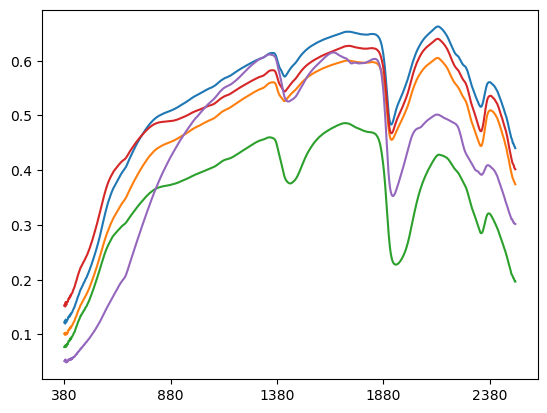

In [34]:
for i in range (0,5,1):
    clipped_spectra.iloc[i,:].plot()

## First Order Derivative

In [35]:
def fod (spectra):
    fo_spec = spectra.iloc[:,:].copy()
    (row,col) = fo_spec.shape
    
    for i in range(0,col):
        if i==col-1:
            fo_spec.iloc[:,i] = fo_spec.iloc[:,i-1]
        else:    
            fo_spec.iloc[:,i] = (spectra.iloc[:,i+1]- spectra.iloc[:,i])
        
    fo_spec = 100*fo_spec
    return(fo_spec.copy())

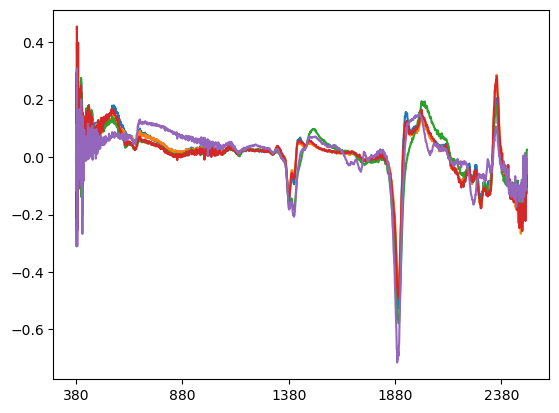

In [36]:
fod_spec = fod(spec2[51])

for i in range (0,5,1):
    fod_spec.iloc[i,:].plot()


In [37]:
fod1 = {}
for i in window_lengths:
    fod1[i] = filt_sg(fod_spec, i, 'sg1')
    
fod2 = {}
for i in window_lengths:
    fod2[i] = filt_sg(fod_spec, i, 'sg2') 

## Continuum Removal

In [38]:
def continuum_removal(points, show=False):
    x1, y1 = points.T
    augmented = np.concatenate([points, [(x1[0], np.min(y1)-1), (x1[-1], np.min(y1)-1)]], axis=0)
    hull = ConvexHull(augmented)
    continuum_points = points[np.sort([v for v in hull.vertices if v < len(points)])]
    continuum_function = interp1d(*continuum_points.T)
    yprime = continuum_function(x1) - y1
    #yprime = y1 / continuum_function(x1)

    if show:
        fig, axes = plt.subplots(2, 1, sharex=True)
        axes[0].plot(x1, y1, label='Data')
        axes[0].plot(*continuum_points.T, label='Continuum')
        axes[0].legend()
        axes[1].plot(x1, yprime, label='Data / Continuum')
        axes[1].legend()

    return yprime


def continuum_removed(spectra):
    cr_spec = spectra.copy()
    
    x1 = np.arange (loc_min, loc_max+1, 1)
    row, col = spectra.shape
    
    for r in range(0,row,1):
        y1 = cr_spec.iloc[r,:]
        points = np.c_[x1, y1]
        yprime = continuum_removal(points, show=False)
        cr_spec.iloc[r,:] = yprime
        
    return cr_spec

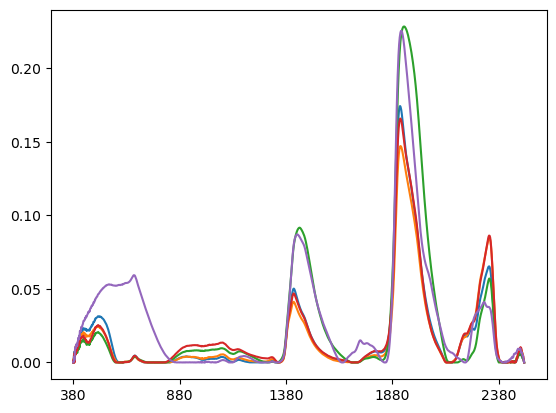

In [39]:
cr_spec = continuum_removed(spec2[51])

for i in range (0,5,1):
    cr_spec.iloc[i,:].plot()
    

In [49]:
cr1 = {}
for i in window_lengths:
    cr1[i] = filt_sg(cr_spec, i, 'sg1')
    
cr2 = {}
for i in window_lengths:
    cr2[i] = filt_sg(cr_spec, i, 'sg2')  
 

## Resampling (n_bands)

In [53]:
def resample_spectra (spectra, n_band):
    row, width = spectra.shape
    if n_band == 0:
        red_spectra = spectra.copy()
    else:
        w = width/n_band
        
        #----- obtaining the sampling locations in indx----
        indx = []
        for i in range (0,n_band,1):
            indx.append(np.floor((i+0.5)*w))
            
        #------ applying smoothing filter on spectra---------
        temp_smooth = sgsmooth (spectra, np.floor(0.5*w).astype(int))
        
        #------ picking values at sampling locations---------
        red_spectra = temp_smooth.iloc[:, indx].copy()
        
    return (red_spectra)

### 1. Sampled Original (sampled_spec: sampled clipped_spectra)

## Lab data resampled on 283 bands( excluding 380 and 2500)

In [61]:
sampled_spectra = resample_spectra(spec2[51], 283)
sampled_spectra.head(2)
#sampled_spectra.shape

,384,392,399,407,414,422,429,437,444,452,459,467,474,482,489,497,504,512,519,527,534,541,549,556,564,571,579,586,594,601,609,616,624,631,639,646,654,661,669,676,684,691,699,706,714,721,729,736,744,751,...,2129,2136,2144,2151,2159,2166,2174,2181,2189,2196,2204,2211,2219,2226,2234,2241,2249,2256,2264,2271,2279,2286,2294,2301,2309,2316,2324,2331,2339,2346,2353,2361,2368,2376,2383,2391,2398,2406,2413,2421,2428,2436,2443,2451,2458,2466,2473,2481,2488,2496
0,0.123372,0.124920,0.130911,0.135082,0.138833,0.145446,0.151506,0.160338,0.168556,0.177001,0.183690,0.190186,0.195779,0.202295,0.208178,0.215786,0.223355,0.232312,0.240718,0.250754,0.260005,0.270021,0.282406,0.294074,0.307747,0.319301,0.331538,0.341001,0.350517,0.358037,0.365638,0.370994,0.376606,0.381709,0.387517,0.392390,0.397227,0.400811,0.405442,0.411121,0.418540,0.424636,0.431194,0.436784,0.442993,0.448121,0.453793,0.458424,0.463475,0.467756,...,0.661630,0.662540,0.661690,0.659535,0.656475,0.653132,0.648650,0.644046,0.637610,0.631301,0.623897,0.618213,0.612855,0.609900,0.606836,0.602092,0.596326,0.592351,0.589674,0.585502,0.576946,0.566940,0.556242,0.549074,0.540483,0.532794,0.525420,0.519257,0.516073,0.520730,0.531932,0.547094,0.556765,0.560651,0.560541,0.557748,0.555293,0.551303,0.546591,0.539717,0.532142,0.523760,0.515467,0.505776,0.497601,0.485069,0.472990,0.460489,0.451503,0.444305
1,0.101308,0.101508,0.107062,0.111424,0.114633,0.120617,0.126227,0.134407,0.141818,0.149202,0.155039,0.160834,0.165957,0.171796,0.177278,0.184236,0.191265,0.199616,0.207368,0.216657,0.225024,0.233851,0.244265,0.253728,0.264482,0.273381,0.282841,0.290256,0.297902,0.304257,0.311039,0.315965,0.321129,0.325971,0.331476,0.336117,0.340833,0.344511,0.349209,0.354598,0.361414,0.366993,0.373090,0.378368,0.384324,0.389315,0.394950,0.399623,0.404747,0.409094,...,0.604529,0.605031,0.603533,0.600956,0.597680,0.594402,0.590448,0.586137,0.579817,0.573639,0.567122,0.562145,0.557754,0.554521,0.550071,0.544822,0.538330,0.533511,0.528618,0.522615,0.512325,0.501372,0.489793,0.482328,0.473464,0.465223,0.456533,0.449006,0.444413,0.449604,0.463903,0.484769,0.499529,0.507446,0.509410,0.508257,0.505855,0.501710,0.497123,0.489420,0.481215,0.471259,0.462265,0.451147,0.440878,0.425563,0.411874,0.396932,0.385990,0.378140


In [71]:
w_2500 = spectra["2500"]
sampled_spectra = sampled_spectra.join(spectra["2500"])
# sampled_spectra.head(2)
# w_380 = spectra["380"]
# sampled_spectra = sampled_spectra.insert(0, w_380)

ValueError: columns overlap but no suffix specified: Index(['2500'], dtype='object')

In [54]:
sampled_spec = {}
for w in nbands_sampling:
    sampled_spec[w] = resample_spectra (clipped_spectra, w)

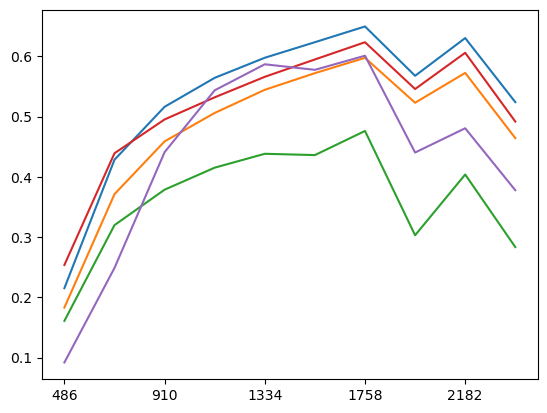

In [55]:
for i in range (0,5,1):
    sampled_spec[10].iloc[i,:].plot()

In [34]:

resampled_spec = resample_spectra (spectra,280)


<AxesSubplot:>

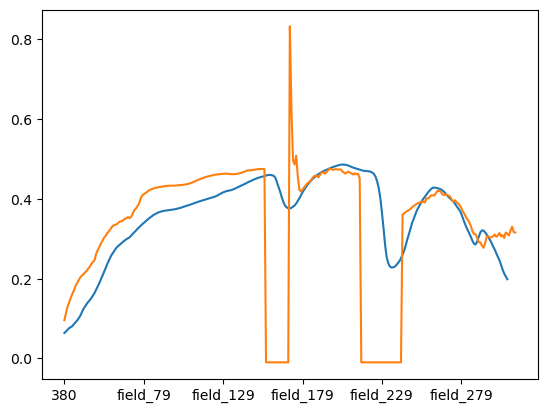

In [35]:
resampled_spec.iloc[2,:].plot()
spectra1.iloc[1,:].plot()

### 2. Sampled Continuum Removed  (sampled_cr)

In [41]:
sampled_cr = {}
for w in nbands_sampling:
    sampled_cr[w] = resample_spectra (cr_spec, w)

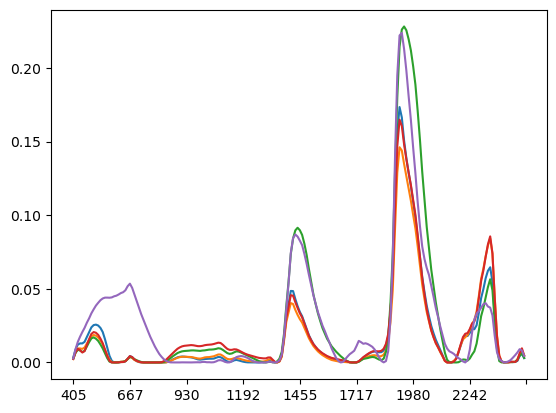

In [46]:
for i in range (0,5,1):
    sampled_cr[200].iloc[i,:].plot()

### 3. Sampled FOD  (sampled_fod)

In [1]:
sampled_fod = {}
for w in nbands_sampling:
    sampled_fod[w] = resample_spectra (fod_spec, w)

NameError: name 'nbands_sampling' is not defined

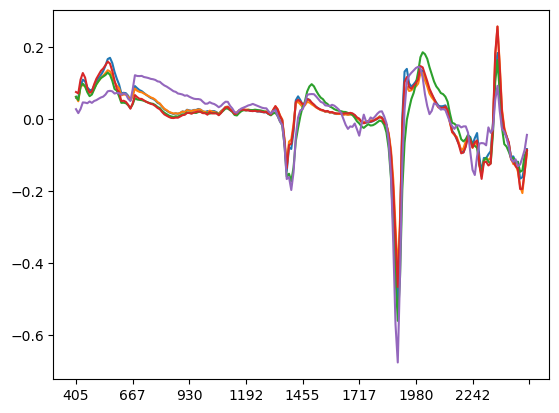

In [49]:
for i in range (0,5,1):
    sampled_fod[200].iloc[i,:].plot()

## Visualizing Processed Spectrum (variable samples)

In [51]:
def plot_spec (sample, process):
    x1 = spec2[51].iloc[sample,:]
    x1.plot()
    if process == 'continuum':
        x2 = cr_spec.iloc[sample,:]
        x2.plot()
    else: 
        x3 = fod_spec.iloc[sample,:]/1.5
        x3.plot()
    plt.ylim([-0.6, 0.8])

ipywidgets.interact(plot_spec, sample = (0, 293,1), process = ['fod', 'continuum'])

interactive(children=(IntSlider(value=146, description='sample', max=293), Dropdown(description='process', opt…

<function __main__.plot_spec(sample, process)>

# Step 1b: Target  Preprocessing (Outliers removal and Normalization)

In [52]:
df = pd.read_csv('uae.csv')
# ------------- Target Isolation ----------------------

clr = ['#F4A460', '#8B7355', '#A52A2A', 'green']

def isolate_targets(df, target_names):
    T=[]
    for i in range (0,len(target_names)):
        T.append(df[target_names[i]])
    return(T)
    
T = isolate_targets(df,target_names) 


# --- TODO : Also define and Use other normalisation methods ----
def normalize_targets(T):          
    NT =[]
    for i in range(0, len(T)):
        NT.append(lognormal(T[i].copy()))
    return(NT)

NT = normalize_targets(T)


## Correlation between wavelengths and Targets

In [54]:
plt.style.use(['science','notebook','grid'])
# Pearson corelation between different wavelengths and Targets/Outputs (i.e, sand, clay, silt, and TOC) 

def find_rpval (spectra, T):
    r_val = []
    p_val = []
    for i in range (0,len(T)):
        p_val.append(spectra.loc[[0],:].copy())
        r_val.append(spectra.loc[[0],:].copy())
        for j in range(c_min, c_max+1):
            r_val[i].iloc[0,j], p_val[i].iloc[0,j] = stats.pearsonr(T[i], spectra.iloc[:, j])
    return(r_val, p_val)

r_val, p_val = find_rpval (spec2[51], T)

light_blue = '#6495ED'
spec_std = 4*spec2[51].std()
mean_spec_std = spec_std.copy()
mean_spec_std.iloc[:] = spec_std.mean()

def plot_corr (target, mean_of_std):
    i = target_names.index(target)
    r_val[i].iloc[0,:].plot(color = clr[i])
    spec_std.plot(color = 'blue')
    if mean_of_std == 'on':
        mean_spec_std.plot(color = 'blue', linewidth=1, linestyle='dashed')
    plt.ylim([-0.6, 0.6])

ipywidgets.interact(plot_corr, target = target_names, mean_of_std= ['on', 'off'])

interactive(children=(Dropdown(description='target', options=('sand', 'silt', 'clay', 'TOC'), value='sand'), D…

<function __main__.plot_corr(target, mean_of_std)>

# Step 2:  Parameters for Best Train-Test Split  

In [63]:
# Building Mtree (Model Tree) ----------------------------------

tst_siz = 0.2

rand_t = [None] * (len(T))
err_t = [None] * (len(T))

print('Without Normalization:')
for i in range (0,len(T)):
    rand_t[i], err_t[i] = best_split(spectra.copy(), T[i], tst_siz) 
    print ('For '+ target_names[i]+ ' :test size =', tst_siz, '\t min bin error=', err_t[i], '\t at randome state =', rand_t[i])
    
rand_nt = [None] * (len(T))
err_nt = [None] * (len(T))

print('After Normalization:')
for i in range (0,len(T)):
    rand_nt[i], err_nt[i] = best_split(spectra.copy(), NT[i], tst_siz)     
    print ('For '+ target_names[i]+ ' :test size =', tst_siz, '\t min bin error=', err_nt[i], '\t at randome state =', rand_nt[i])
    
    

Without Normalization:
For sand :test size = 0.2 	 min bin error= 66.25 	 at randome state = 21
For silt :test size = 0.2 	 min bin error= 48.75 	 at randome state = 2
For clay :test size = 0.2 	 min bin error= 33.75 	 at randome state = 7
For TOC :test size = 0.2 	 min bin error= 41.25 	 at randome state = 24
After Normalization:
For sand :test size = 0.2 	 min bin error= 66.25 	 at randome state = 9
For silt :test size = 0.2 	 min bin error= 68.75 	 at randome state = 2
For clay :test size = 0.2 	 min bin error= 33.75 	 at randome state = 7
For TOC :test size = 0.2 	 min bin error= 66.25 	 at randome state = 14


# Step 3: Parameters for Best Model Fit 

## PLSR

In [64]:

from sklearn import linear_model

def best_param_PLSR (X_train, X_test, y_train, y_test, n_comp):
        
    iqrpL = []
    
    for n in range(1,n_comp):
        Model = PLSRegression(n_components=n, scale=True)
        Model.fit(X_train, y_train)
        y_pred = Model.predict(X_test, copy=True)
        
        iqrp_test = iqrp(y_pred, y_test)
#         r2_test = r2_score(y_test, y_pred)
#         rpd_test = y_test.std()/np.sqrt(mean_squared_error(y_test, y_pred))
               
        iqrpL.append(iqrp_test)
#         r2L.append(r2_test)
#         rpdL.append(rpd_test)
        
        
    
    IQRP = max(iqrpL)
    n_iqrp = iqrpL.index(max(iqrpL))+1
    
#     R2 = max(r2L)
#     n_r2 = r2L.index(R2)+1    
#     RPD = max(rpdL)
#     n_rpd = rpdL.index(RPD)+1
    
#    print('IQRP :', IQRP,  'R2 :', R2,  'RPD:', RPD, '>>> n_comp: ', n_iqrp, n_r2, n_rpd)    
    return (n_iqrp)
        
 

# Step 4: Building Model Tree (Mtree)

In [65]:
import os
os.system('say "your program has finished"')
import time

In [165]:
# 0. Available machine learning regression models --------------------------------- (7)
ml_methods = ['mult', 'plsr', 'randomforest', 'cubist', 'svr', 'ridge', 'gbrt']
#ml_methods = ['mult', 'plsr', 'cubist', 'randomforest', 'ridge' 'gbrt', 'svr']

In [167]:
max_n_comp = 5

def build_tree_for (method_name):
    tree ={}
    start = time.time()
    m = method_name
    #-- code to build tree----
    for t in target_names:
        
        if t == 'sand' and m == 'mult':
            os.system('say "tree for multilinear running on sand"')
            print('tree for multilinear running on sand')
        if t == 'silt' and m == 'mult':
            os.system('say "tree for multilinear running on silt"')
            print('tree for multilinear running on silt')
        if t == 'clay' and m == 'mult':
            os.system('say "tree for multilinear running on clay"')
            print('tree for multilinear running on clay')
        if t == 'TOC' and m == 'mult':
            os.system('say "tree for multilinear running on TOC"')
            print('tree for multilinear running on TOC')
            
        if t == 'sand' and m == 'plsr':
            os.system('say "tree for plsr running on sand"')
            print('tree for plsr running on sand')
        if t == 'silt' and m == 'plsr':
            os.system('say "tree for plsr running on silt"')
            print('tree for plsr running on silt')
        if t == 'clay' and m == 'plsr':
            os.system('say "tree for plsr running on clay"')
            print('tree for plsr running on clay')
        if t == 'TOC' and m == 'plsr':
            os.system('say "tree for plsr running on TOC"')
            print('tree for plsr running on TOC')
            
        if t == 'sand' and m == 'randomforest':
            os.system('say "tree for randomforest running on sand"')
            print('tree for randomforest running on sand')
        if t == 'silt' and m == 'randomforest':
            os.system('say "tree for randomforest running on silt"')
            print('tree for randomforest running on silt')
        if t == 'clay' and m == 'randomforest':
            os.system('say "tree for randomforest running on clay"')
            print('tree for randomforest running on clay')
        if t == 'TOC' and m == 'randomforest':
            os.system('say "tree for randomforest running on TOC"')    
            print('tree for randomforest running on TOC')
            
        if t == 'sand' and m == 'cubist':
            os.system('say "tree for cubist running on sand"')
            print('tree for cubist running on sand')
        if t == 'silt' and m == 'cubist':
            os.system('say "tree for cubist running on silt"')
            print('tree for cubist running on silt')
        if t == 'clay' and m == 'cubist':
            os.system('say "tree for cubist running on clay"')
            print('tree for cubist running on clay')
        if t == 'TOC' and m == 'cubist':
            os.system('say "tree for cubist running on TOC"')
            print('tree for cubist running on TOC')
            
        if t == 'sand' and m == 'svr':
            os.system('say "tree for svr running on sand"')
            print('tree for svr running on sand')
        if t == 'silt' and m == 'svr':
            os.system('say "tree for svr running on silt"')
            print('tree for svr running on silt')
        if t == 'clay' and m == 'svr':
            os.system('say "tree for svr running on clay"')
            print('tree for svr running on clay')
        if t == 'TOC' and m == 'svr':
            os.system('say "tree for svr running on TOC"')
            print('tree for svr running on TOC')
            
        if t == 'sand' and m == 'ridge':
            os.system('say "tree for ridge running on sand"')
            print('tree for ridge running on sand')
        if t == 'silt' and m == 'ridge':
            os.system('say "tree for ridge running on silt"')
            print('tree for ridge running on silt')
        if t == 'clay' and m == 'ridge':
            os.system('say "tree for ridge running on clay"')
            print('tree for ridge running on clay')
        if t == 'TOC' and m == 'ridge':
            os.system('say "tree for ridge running on TOC"')
            print('tree for ridge running on TOC')
            
            
        if t == 'sand' and m == 'gbrt':
            os.system('say "tree for gbrt running on sand"')
            print('tree for gbrt running on sand')
        if t == 'silt' and m == 'gbrt':
            os.system('say "tree for gbrt running on silt"')
            print('tree for gbrt running on silt')
        if t == 'clay' and m == 'gbrt':
            os.system('say "tree for gbrt running on clay"')
            print('tree for gbrt running on clay')
        if t == 'TOC' and m == 'gbrt':
            os.system('say "tree for gbrt running on TOC"')
            print('tree for gbrt running on TOC')     
                 
            
        tree[t] ={}
        for tp in prepare_target:
            tree[t][tp] ={}
            for n in nbands_sampling:
                tree[t][tp][n] ={}
                for p in prepare_spec:
                    tree[t][tp][n][p] ={}
                    
                    #---- following case : either sampling or decision tree methods--
                    #---- in this case select appropriate sampled spectrum -------
                    if n!=0 or m == 'randomforest' or m == 'cubist' or m == 'gbrt':
                        #------ case: sampling required-----------------------
                        Y = tree[t][tp][n][p]
                        
                        #------ setting spec to appropriate sampled spectra----
                        if p == 'none':
                            if n == 0:
                                #---- reched here due to tree based methods e.g. randomforest--
                                spec = sampled_spec[100]
                            else:
                                #---- reached here with some n!=0----
                                spec = sampled_spec[n]
                        
                        elif p == 'fod':
                            if n == 0:
                                #---- reched here due to tree based methods e.g. randomforest--
                                spec = sampled_fod[100]
                            else:
                                #---- reached here with some n!=0----
                                spec = sampled_fod[n]
                                
                        else:  
                            if n == 0:
                                #---- reched here due to tree based methods e.g. randomforest--
                                spec = sampled_cr[100]
                            else:
                                #---- reached here with some n!=0----
                                spec = sampled_cr[n]
                        
                        #---- target selection and normalization ---
                        if tp == 'none':
                            y = T[target_names.index(t)]
                            rand_n = rand_t[target_names.index(t)]  #-- for future use in train-test split
                        else:
                            y = NT[target_names.index(t)]
                            rand_n = rand_nt[target_names.index(t)] #-- for future use in train-test split
                            #print('one more target set')
                            
                        #---- performing train-test split----------------------
                        X_train, X_test, y_train, y_test = train_test_split(spec, y, test_size= tst_siz, random_state=rand_n)
                            
                        #----- PLSR: best parameters, fitting, and prediction
                        if m == 'plsr':
                            n_com = best_param_PLSR (X_train, X_test, y_train, y_test, max_n_comp)
                            #print('one more n_comp', n_com)
                            Model = PLSRegression(n_components=n_com, scale=True)
                            Model.fit(X_train, y_train)
                            y_pred = Model.predict(X_test, copy=True)
                            yhat_pred = Model.predict(X_train, copy=True)
                                
                            Y['test'] = y_test
                            Y['testP'] = y_pred
                            Y['train'] = y_train
                            Y['trainP'] = yhat_pred
                            Y['n_comp'] = n_com
                            Y['iqrp_test'] = iqrp(y_pred, y_test)
                                
                        #----- MULTILINEAR:  fitting, and prediction---------- 
                        if m == 'mult':
                            Model = linear_model.LinearRegression()
                            Model.fit(X_train, y_train)
                            y_pred = Model.predict(X_test)
                            yhat_pred = Model.predict(X_train)
                                
                            Y['test'] = y_test
                            Y['testP'] = y_pred
                            Y['train'] = y_train
                            Y['trainP'] = yhat_pred
                            Y['iqrp_test'] = iqrp(y_pred, y_test)
                                
                        #----- RANDOM_FOREST:   fitting, and prediction---------- 
                        if m == 'randomforest': 
                            Model = RandomForestRegressor(random_state= 20)
                            Model.fit(X_train, y_train)
                            y_pred = Model.predict(X_test)
                            yhat_pred = Model.predict(X_train)
                                
                            Y['test'] = y_test
                            Y['testP'] = y_pred
                            Y['train'] = y_train
                            Y['trainP'] = yhat_pred
                            Y['iqrp_test'] = iqrp(y_pred, y_test)
                            
                       
                       #----- CUBIST REGRESSION:    fitting and prediction---------
                        if m == 'cubist':
                            Model = Cubist(n_rules = 50, n_committees = 5, random_state = 42)
                            Model.fit(X_train, y_train)
                            y_pred = Model.predict(X_test)
                            yhat_pred = Model.predict(X_train)
                                
                            Y['test'] = y_test
                            Y['testP'] = y_pred
                            Y['train'] = y_train
                            Y['trainP'] = yhat_pred
                            Y['iqrp_test'] = iqrp(y_pred, y_test)
                            
                            
                      #------ SUPPORT VECTOR MACHINE FOR REGRESSION: fitting and prediction-----------      
                        if m == 'svr': 
                            Model = SVR()
                            Model.fit(X_train, y_train)
                            y_pred = Model.predict(X_test)
                            yhat_pred = Model.predict(X_train)
                                
                            Y['test'] = y_test
                            Y['testP'] = y_pred
                            Y['train'] = y_train
                            Y['trainP'] = yhat_pred 
                            Y['iqrp_test'] = iqrp(y_pred, y_test)
                            
                     
                    #------ RIDGE REGRESSION: fitting and prediction-----------      
                        if m == 'ridge': 
                            Model = KernelRidge()
                            Model.fit(X_train, y_train)
                            y_pred = Model.predict(X_test)
                            yhat_pred = Model.predict(X_train)
                                
                            Y['test'] = y_test
                            Y['testP'] = y_pred
                            Y['train'] = y_train
                            Y['trainP'] = yhat_pred 
                            Y['iqrp_test'] = iqrp(y_pred, y_test)
                            
                            
                            
                   #------ GRADIENT BOOSTING REGRESSION: fitting and prediction-----------      
                        if m == 'gbrt': 
                            Model = GradientBoostingRegressor()
                            Model.fit(X_train, y_train)
                            y_pred = Model.predict(X_test)
                            yhat_pred = Model.predict(X_train)
                                
                            Y['test'] = y_test
                            Y['testP'] = y_pred
                            Y['train'] = y_train
                            Y['trainP'] = yhat_pred 
                            Y['iqrp_test'] = iqrp(y_pred, y_test)
                                      
                            
                            
                    #---- following case: no sampling needed and model is not tree based methods e.g. randomforest ---    
                    else: 
                        for sg in sg_filters:
                            tree[t][tp][n][p][sg] ={}
                            for w in window_lengths:
                                tree[t][tp][n][p][sg][w]={}
                                Y = tree[t][tp][n][p][sg][w]
                                
                                # -- optimal train test split----------------------------------------
                            
                                # -- deciding the smoothed spectra in present branch ---
                                if sg == 'sg1':
                                    spec = spec1[w]
                                else:
                                    spec = spec2[w]
                                
                                # -- preprocessing the spectra ------
                    
                                #--- no preprocessing ---------------
                                if p == 'none':
                                    spec = spec
                                
                                #--- first order derivative + smoothing------    
                                elif p == 'fod':
                                    if sg == 'sg1':
                                        spec = fod1[w]
                                    else:
                                        spec = fod2[w]
                                    #print('fod for one more case')
                                
                                #--- continuum removal + smoothing---------    
                                else: 
                                    if sg == 'sg1':
                                        spec = cr1[w]
                                    else:
                                        spec = cr2[w]
                                    #print('cr for one more case')
                            
                                
                                #---- target selection and normalization ---
                                if tp == 'none':
                                    y = T[target_names.index(t)]
                                    rand_n = rand_t[target_names.index(t)]  #-- for future use in train-test split
                                else:
                                    y = NT[target_names.index(t)]
                                    rand_n = rand_nt[target_names.index(t)] #-- for future use in train-test split
                                    #print('one more target set')
                            
                                #---- performing train-test split----------------------
                                X_train, X_test, y_train, y_test = train_test_split(spec, y, test_size= tst_siz, random_state=rand_n)
                            
                                
                                #----- PLSR: best parameters, fitting, and prediction
                                if m == 'plsr':
                                    n_com = best_param_PLSR (X_train, X_test, y_train, y_test, max_n_comp)
                                    #print('one more n_comp', n_com)
                                    Model = PLSRegression(n_components=n_com, scale=True)
                                    Model.fit(X_train, y_train)
                                    y_pred = Model.predict(X_test, copy=True)
                                    yhat_pred = Model.predict(X_train, copy=True)
                                
                                    Y['test'] = y_test
                                    Y['testP'] = y_pred
                                    Y['train'] = y_train
                                    Y['trainP'] = yhat_pred
                                    Y['n_comp'] = n_com
                                    Y['iqrp_test'] = iqrp(y_pred, y_test)
                                
                                #----- MULTILINEAR:  fitting, and prediction---------- 
                                if m == 'mult':
                                    Model = linear_model.LinearRegression()
                                    Model.fit(X_train, y_train)
                                    y_pred = Model.predict(X_test)
                                    yhat_pred = Model.predict(X_train)
                                
                                    Y['test'] = y_test
                                    Y['testP'] = y_pred
                                    Y['train'] = y_train
                                    Y['trainP'] = yhat_pred
                                    Y['iqrp_test'] = iqrp(y_pred, y_test)
                                
#                                 #----- RANDOM_FOREST:   fitting, and prediction---------- 
#                                 if m == 'randomforest': 
#                                     Model = RandomForestRegressor(random_state= 20)
#                                     Model.fit(X_train, y_train)
#                                     y_pred = Model.predict(X_test)
#                                     yhat_pred = Model.predict(X_train)
                                
#                                     Y['test'] = y_test
#                                     Y['testP'] = y_pred
#                                     Y['train'] = y_train
#                                     Y['trainP'] = yhat_pred


                    
                                #------ SUPPORT VECTOR MACHINE FOR REGRESSION: fitting and prediction-----------      
                                if m == 'svr': 
                                    Model = SVR(kernel = 'poly', degree =3, C = 0.0001)
                                    Model.fit(X_train, y_train)
                                    y_pred = Model.predict(X_test)
                                    yhat_pred = Model.predict(X_train)
                                
                                    Y['test'] = y_test
                                    Y['testP'] = y_pred
                                    Y['train'] = y_train
                                    Y['trainP'] = yhat_pred  
                                    Y['iqrp_test'] = iqrp(y_pred, y_test)
                                    
                         
                         #--------- RIDGE REGRESSION: fitting and prediction------------------
                                if m == 'ridge': 
                                    Model = KernelRidge()
                                    Model.fit(X_train, y_train)
                                    y_pred = Model.predict(X_test)
                                    yhat_pred = Model.predict(X_train)
                                
                                    Y['test'] = y_test
                                    Y['testP'] = y_pred
                                    Y['train'] = y_train
                                    Y['trainP'] = yhat_pred 
                                    Y['iqrp_test'] = iqrp(y_pred, y_test)
                            
                            
                      
     
    
    end = time.time()                            
    os.system('say "your program has finished"')                            

    print('End time - Start time =', (end-start)) 
    
    return (tree.copy())


## Mtree initialisation (do not run below code every time)

In [120]:
Mtree ={}

## Creating different branches of Mtree (for separate methods)

### PLSR Branch 

In [121]:
Mtree['plsr'] = build_tree_for ('plsr')

tree for plsr running on sand
tree for plsr running on silt
tree for plsr running on clay
tree for plsr running on TOC
End time - Start time = 148.35606241226196


### Multiple Linear Regression Branch

In [122]:
Mtree['mult'] = build_tree_for ('mult')

tree for multilinear running on sand
tree for multilinear running on silt
tree for multilinear running on clay
tree for multilinear running on TOC
End time - Start time = 52.66049814224243


### Random Forest Branch

In [123]:
Mtree['randomforest'] = build_tree_for ('randomforest')

tree for randomforest running on sand
tree for randomforest running on silt
tree for randomforest running on clay
tree for randomforest running on TOC
End time - Start time = 391.4802784919739


### SVM Branch

In [124]:
Mtree['svr'] = build_tree_for ('svr')

tree for svr running on sand
tree for svr running on silt
tree for svr running on clay
tree for svr running on TOC
End time - Start time = 65.46381688117981


### GBRT Branch

In [168]:
Mtree['gbrt'] = build_tree_for ('gbrt')

tree for gbrt running on sand
tree for gbrt running on silt
tree for gbrt running on clay
tree for gbrt running on TOC
End time - Start time = 236.7806715965271


### Ridge Regression Branch

In [125]:
Mtree['ridge'] = build_tree_for ('ridge')

tree for ridge running on sand
tree for ridge running on silt
tree for ridge running on clay
tree for ridge running on TOC
End time - Start time = 35.23966431617737


### Cubist Branch

In [126]:
Mtree['cubist'] = build_tree_for ('cubist')

tree for cubist running on sand


C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return {col_name: _get_data_format(col_data) for col_name, col_data in df.iteritems()}
C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return {col_name: _get_data_format(col_data) for col_name, col_data in df.iteritems()}
C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return {col_name: _get_data_format(col_data) for col_name, col_data in df.iteritems()}
C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future versio

C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return {col_name: _get_data_format(col_data) for col_name, col_data in df.iteritems()}
C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return {col_name: _get_data_format(col_data) for col_name, col_data in df.iteritems()}
C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return {col_name: _get_data_format(col_data) for col_name, col_data in df.iteritems()}
C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future versio

tree for cubist running on silt


C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return {col_name: _get_data_format(col_data) for col_name, col_data in df.iteritems()}
C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return {col_name: _get_data_format(col_data) for col_name, col_data in df.iteritems()}
C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return {col_name: _get_data_format(col_data) for col_name, col_data in df.iteritems()}
C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future versio

C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return {col_name: _get_data_format(col_data) for col_name, col_data in df.iteritems()}
C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return {col_name: _get_data_format(col_data) for col_name, col_data in df.iteritems()}
C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return {col_name: _get_data_format(col_data) for col_name, col_data in df.iteritems()}
C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future versio

tree for cubist running on clay


C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return {col_name: _get_data_format(col_data) for col_name, col_data in df.iteritems()}
C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return {col_name: _get_data_format(col_data) for col_name, col_data in df.iteritems()}
C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return {col_name: _get_data_format(col_data) for col_name, col_data in df.iteritems()}
C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future versio

C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return {col_name: _get_data_format(col_data) for col_name, col_data in df.iteritems()}
C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return {col_name: _get_data_format(col_data) for col_name, col_data in df.iteritems()}
C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return {col_name: _get_data_format(col_data) for col_name, col_data in df.iteritems()}
C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future versio

tree for cubist running on TOC


C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return {col_name: _get_data_format(col_data) for col_name, col_data in df.iteritems()}
C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return {col_name: _get_data_format(col_data) for col_name, col_data in df.iteritems()}
C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return {col_name: _get_data_format(col_data) for col_name, col_data in df.iteritems()}
C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future versio

C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return {col_name: _get_data_format(col_data) for col_name, col_data in df.iteritems()}
C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return {col_name: _get_data_format(col_data) for col_name, col_data in df.iteritems()}
C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return {col_name: _get_data_format(col_data) for col_name, col_data in df.iteritems()}
C:\Users\abhis\anaconda3\envs\RP_Env\lib\site-packages\cubist\_quinlan_attributes.py:67: FutureWarning: iteritems is deprecated and will be removed in a future versio

End time - Start time = 133.056982755661


## Best of all worlds

In [171]:
def best_model_parameters (Mtree, target, method):
    t=target
    m= method
    
    best_iqrp = 0
    best_sg ='NA'
    best_w = 'NA'
    best_n_comp = 'NA'
    
    if m == 'randomforest' or m == 'cubist' or m == 'gbrt':
        for tp in prepare_target:
            for n in nbands_sampling:
                for p in prepare_spec:
                    Y = Mtree[m][t][tp][n][p]
                    cur_iqrp = Y['iqrp_test']
                    if cur_iqrp > best_iqrp:
                        best_iqrp = cur_iqrp
                        best_tp = tp
                        best_n = n
                        best_p = p
                        
                            
    else:
        for tp in prepare_target:
            for n in nbands_sampling:
                for p in prepare_spec:
                    for sg in sg_filters:
                        for w in window_lengths:
                            if n == 0:
                                Y = Mtree[m][t][tp][n][p][sg][w]
                            else:
                                Y = Mtree[m][t][tp][n][p]
                            cur_iqrp = Y['iqrp_test']
                            if cur_iqrp > best_iqrp:
                                best_iqrp = cur_iqrp
                                best_tp = tp
                                best_n = n
                                best_p = p
                                best_sg = sg
                                best_w = w
                                if m == 'plsr':
                                    best_n_comp = Y['n_comp']
    param_list = ['IQRP:', np.round(best_iqrp,2), 'pSpec:', best_p, 'bands:', best_n, 'pTar:', best_tp, 'filt:', best_sg, 'win:', best_w, 'best_n_comp: ', best_n_comp]                                 
    return (param_list)                                
    

In [153]:
param_list = best_model_parameters (Mtree, 'sand', 'randomforest')
print(param_list)

['IQRP:', 1.6, 'pSpec:', 'continuum', 'bands:', 0, 'pTar:', 'none', 'filt:', 'NA', 'win:', 'NA', 'best_n_comp: ', 'NA']


In [154]:
param_list = best_model_parameters (Mtree, 'sand', 'plsr')
print(param_list)

['IQRP:', 1.59, 'pSpec:', 'fod', 'bands:', 20, 'pTar:', 'none', 'filt:', 'sg1', 'win:', 0, 'best_n_comp: ', 2]


In [157]:
param_list = best_model_parameters (Mtree, 'sand', 'cubist')
print(param_list)

['IQRP:', 1.56, 'pSpec:', 'fod', 'bands:', 50, 'pTar:', 'none', 'filt:', 'NA', 'win:', 'NA', 'best_n_comp: ', 'NA']


In [158]:
param_list = best_model_parameters (Mtree, 'sand', 'mult')
print(param_list)

['IQRP:', 1.46, 'pSpec:', 'continuum', 'bands:', 5, 'pTar:', 'none', 'filt:', 'sg1', 'win:', 0, 'best_n_comp: ', 'NA']


In [159]:
param_list = best_model_parameters (Mtree, 'sand', 'ridge')
print(param_list)

['IQRP:', 1.44, 'pSpec:', 'fod', 'bands:', 200, 'pTar:', 'minmax', 'filt:', 'sg1', 'win:', 0, 'best_n_comp: ', 'NA']


In [160]:
param_list = best_model_parameters (Mtree, 'sand', 'svr')
print(param_list)

['IQRP:', 1.63, 'pSpec:', 'none', 'bands:', 500, 'pTar:', 'none', 'filt:', 'sg1', 'win:', 0, 'best_n_comp: ', 'NA']


In [172]:
param_list = best_model_parameters (Mtree, 'sand', 'gbrt')
print(param_list)

['IQRP:', 1.58, 'pSpec:', 'fod', 'bands:', 200, 'pTar:', 'none', 'filt:', 'NA', 'win:', 'NA', 'best_n_comp: ', 'NA']


In [175]:
param_list = best_model_parameters (Mtree, 'clay', 'plsr')
print(param_list)

['IQRP:', 1.78, 'pSpec:', 'fod', 'bands:', 0, 'pTar:', 'none', 'filt:', 'sg1', 'win:', 0, 'best_n_comp: ', 4]


In [1]:
param_list = best_model_parameters (Mtree, 'silt', 'plsr')
print(param_list)

NameError: name 'best_model_parameters' is not defined

## Plotting Model Accuracy (ipywidgets)

In [173]:
def plot_model_acc (target, method, smth_filt, window_len, spec_preprocessing, n_bands, target_preprocessing):
    
    m = method
    t = target
    
    i = target_names.index(target)
    
    sg = smth_filt
    w = window_len
    p = spec_preprocessing
    n = n_bands
    tp = target_preprocessing
    
    if n!=0 or m == 'randomforest' or m =='cubist' or m == 'gbrt':
        Y = Mtree[m][t][tp][n][p]
    else: 
        Y = Mtree[m][t][tp][n][p][sg][w]
    
    
    y_test = Y['test']
    y_pred = Y['testP']
    y_train = Y['train']
    yhat_pred = Y['trainP']
    
    if m == 'plsr':
        n_com = Y['n_comp']
        y_pred = y_pred[:,0]
        yhat_pred = yhat_pred[:,0]
    
    iqrp_test = iqrp(y_pred, y_test)
    r2_test = r2_score(y_test, y_pred)
    rpd_test = y_test.std()/np.sqrt(mean_squared_error(y_test, y_pred))
    
    iqrp_train = iqrp(yhat_pred, y_train)
    r2_train = r2_score(y_train, yhat_pred)
    rpd_train = y_train.std()/np.sqrt(mean_squared_error(y_train, yhat_pred))
    
    y_tp = pd.DataFrame({'actual':y_test.values, 'predic': y_pred})
    z = np.polyfit(y_test, y_pred, 1)
    
    yhat_tp = pd.DataFrame({'actual':y_train.values, 'predic': yhat_pred})
    zhat = np.polyfit(y_train, yhat_pred, 1)
    
    fig, axes = plt.subplots(1,2, figsize=(18,8))
    
    #with plt.style.context(('ggplot')): ---- PLOT of test-prediction --------------------------------------
    y_tp.plot.scatter(ax= axes[0], x="actual", y="predic", alpha=0.8, color = clr[i], edgecolors='k')
    axes[0].plot(y_test, np.polyval(z, y_test),  c='blue', linewidth=1)
    axes[0].plot(y_test, y_test, color='green', linewidth=1)
    axes[0].tick_params(axis='both', labelsize=10)
    axes[0].text(0.05, 0.95, target_names[i]+' (Test Data)', transform=axes[0].transAxes, fontsize = 20, color = clr[i])
    axes[0].text(0.05, 0.90, 'IQRP ={:.2f}'.format(iqrp_test), transform=axes[0].transAxes, fontsize = 16)
    axes[0].text(0.05, 0.85, 'RPD ={:.2f}'.format(rpd_test), transform=axes[0].transAxes, fontsize = 16)
    axes[0].text(0.05, 0.80, 'R2 ={:.2f}'.format(np.round(r2_test,3)), transform=axes[0].transAxes, fontsize = 16)
    axes[0].text(0.95, 0.15, 'Method: '+method, transform=axes[0].transAxes, 
                    horizontalalignment='right', fontsize = 20)
    axes[0].text(0.95, 0.10, 'smoothing window={:.2f}'.format(w), transform=axes[0].transAxes, 
                    horizontalalignment='right', fontsize = 12)
    if method == 'plsr':
        axes[0].text(0.95, 0.05, 'n_component={:.2f}'.format(n_com), transform=axes[0].transAxes, 
                    horizontalalignment='right', fontsize = 12)
    
    #---------------------------------- ---- PLOT of train-prediction --------------------------------------
    yhat_tp.plot.scatter(ax= axes[1], x="actual", y="predic", alpha=0.8, color = clr[i], edgecolors='k')
    axes[1].plot(y_train, np.polyval(zhat, y_train),  c='blue', linewidth=1)
    axes[1].plot(y_train, y_train, color='green', linewidth=1)
    axes[1].tick_params(axis='both', labelsize=10)
    axes[1].text(0.05, 0.95,  target_names[i]+' (Training Data)', transform=axes[1].transAxes,fontsize = 20, color = clr[i])
    axes[1].text(0.05, 0.90, 'IQRP ={:.2f}'.format(iqrp_train), transform=axes[1].transAxes, fontsize = 16)
    axes[1].text(0.05, 0.85, 'RPD ={:.2f}'.format(rpd_train), transform=axes[1].transAxes, fontsize = 16)
    axes[1].text(0.05, 0.80, 'R2 ={:.2f}'.format(np.round(r2_train,3)), transform=axes[1].transAxes, fontsize = 16)
    axes[1].text(0.95, 0.15, 'Method: '+method, transform=axes[1].transAxes, 
                    horizontalalignment='right', fontsize = 20)
    axes[1].text(0.95, 0.10, 'smoothing window={:.2f}'.format(w), transform=axes[1].transAxes, 
                    horizontalalignment='right', fontsize = 12)
        
    

In [174]:
ipywidgets.interact(plot_model_acc, target = target_names, method = ml_methods, smth_filt = sg_filters, 
                    window_len = window_lengths, spec_preprocessing = prepare_spec, n_bands = nbands_sampling, 
                    target_preprocessing = prepare_target)

interactive(children=(Dropdown(description='target', options=('sand', 'silt', 'clay', 'TOC'), value='sand'), D…

<function __main__.plot_model_acc(target, method, smth_filt, window_len, spec_preprocessing, n_bands, target_preprocessing)>

In [ ]:
# 1. Available smoothing filter types: savgol1 and savgol2 ------------------------ (1)
sg_filters = ['sg1', 'sg2']

# 2. Available window lengths for the smoothing filter ---------------------------- (2)
window_lengths = [0, 1, 3, 5, 7, 9, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101]

# 3. Available preprocessing for Spectral data ------------------------------------ (3)
prepare_spec = ['none', 'fod', 'continuum']
#prepare_spec = ['none', 'fod', 'continuum']

# 4. Number of bands available for resampling spectra ----------------------------- (4) 
nbands_sampling = [10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

# 5. Names of target variables in the dataframe ----------------------------------- (5)
target_names = ['sand', 'silt', 'clay', 'TOC']

# 6. Available preprocessing for Target data -------------------------------------- (6)
prepare_target = ['none', 'minmax']

# 0. Available machine learning regression models --------------------------------- (7)
ml_methods = ['mult', 'plsr']
#ml_methods = ['mult', 'plsr', 'cubist', 'randomforest', 'ridge' 'gbrt', 'svm']

# 8. Recorded predictions on test-train data for model accuracy  ------------------ (8)
test_train_predict = ['test', 'testP', 'train', 'trainP']